In [25]:
# package import
import os

import numpy as np

import flopy
print(flopy.__version__)

3.8.2


In [19]:
# set up where simulation workspace will be stored
workspace = os.path.join("data", "mf6_working_with_data")
name = "example_1"
if not os.path.exists(workspace):
    os.makedirs(workspace)

In [20]:
# create the Flopy simulation and tdis objects
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name= "C:/Users/00105010/Projects/Otorowiri/exe/mf6.exe", version="mf6", sim_ws=workspace
)
tdis_rc = [(1.0, 1, 1.0), (10.0, 5, 1.0), (10.0, 5, 1.0), (10.0, 1, 1.0)]
tdis_package = flopy.mf6.modflow.mftdis.ModflowTdis(
    sim, time_units="DAYS", nper=4, perioddata=tdis_rc
)

In [21]:
# create the Flopy groundwater flow (gwf) model object
model_nam_file = f"{name}.nam"
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, model_nam_file=model_nam_file)
# create the flopy iterative model solver (ims) package object
ims = flopy.mf6.modflow.mfims.ModflowIms(sim, pname="ims", complexity="SIMPLE")
# create the discretization package
bot = np.linspace(-3.0, -50.0 / 3.0, 3)
delrow = delcol = 4.0
dis = flopy.mf6.modflow.mfgwfdis.ModflowGwfdis(
    gwf,
    pname="dis",
    nogrb=True,
    nlay=3,
    nrow=101,
    ncol=101,
    delr=delrow,
    delc=delcol,
    top=0.0,
    botm=bot,
)
# create the initial condition (ic) and node property flow (npf) packages
ic_package = flopy.mf6.modflow.mfgwfic.ModflowGwfic(gwf, strt=50.0)
npf_package = flopy.mf6.modflow.mfgwfnpf.ModflowGwfnpf(
    gwf,
    save_flows=True,
    icelltype=[1, 0, 0],
    k=[5.0, 0.1, 4.0],
    k33=[0.5, 0.005, 0.1],
)

In [22]:
tas = {0.0: 0.000002, 200.0: 0.0000001}
rcha = flopy.mf6.modflow.mfgwfrcha.ModflowGwfrcha(
    gwf, timearrayseries=tas, recharge="TIMEARRAYSERIES rcharray_1"
)

In [23]:
# finish defining the time array series properties
rcha.tas.time_series_namerecord = "rcharray_1"
rcha.tas.interpolation_methodrecord = "LINEAR"

In [ ]:


tas_filerecord = ListTemplateGenerator(("gwf6", "evta", "options", "tas_filereord"))

NameError: name 'ListTemplateGenerator' is not defined

In [ ]:
ncpl = geomodel.ncpl
nlay = geomodel.nlay
total_cells = ncpl * nlay

evt_cells = np.arange(geomodel.ncpl) # Assume evapotranspiration occurs in top layer of model (and no pinched out cells_

ext_depth = 1.0    # extinction depth (m)
rate = 1e-3  # ET max (m/d)
time = 0.0

self.surface = np.zeros(total_cells)
self.extinction_depth = np.zeros(total_cells)
tas_0 = np.zeros(total_cells)
tas_1 = np.zeros(total_cells)

for cell in evt_cells:
    #disucell = int(utils.disvcell_to_disucell(geomodel, cell))
    self.surface[cell] = float(geomodel.top_geo[cell])
    self.extinction_depth[cell] = ext_depth
    tas_0[cell] = 0.01
    tas_1[cell] = 0.01

self.evta_tas_data = {0.0: tas_0, 1.0: tas_1}

In [ ]:
evta = flopy.mf6.modflow.mfgwfevta.ModflowGwfevta(gwf,
                        filename = 
                        print_input=True,
                        print_flows=True,
                        save_flows=True,
                        fixed_cell=True, #If True, ET does not shift to underlying active cell if the specified one is inactive
                        pname='EVTA',
                        surface = self.data.surface,
                        depth = self.data.extinction_depth,
                        rate = "timearrayseries",
                        timearrayseries= self.data.evta_tas_data)

    Site Ref  Derived WL (mAHD)  Modelled WL (mAHD)
0   61711381         224.148762          200.235644
1   61711382         238.388697          200.235568
2   61712824         221.419351          200.235201
3   61712850         225.568226          200.234858
4   61712866         213.108773          200.236766
5   61712877         229.460713          200.235501
6   70111706         208.371890          200.248044
7   70118002         215.816420          200.251168
8   70118003         217.881552          200.247565
9   70118006         213.544594          200.261788
10  70118009         213.971103          200.250539
11  70118010         212.823059          200.253678
12  70118014         213.860359          200.249135
13  70118016         213.952963          200.246066
14  70118017         214.384147          200.243550


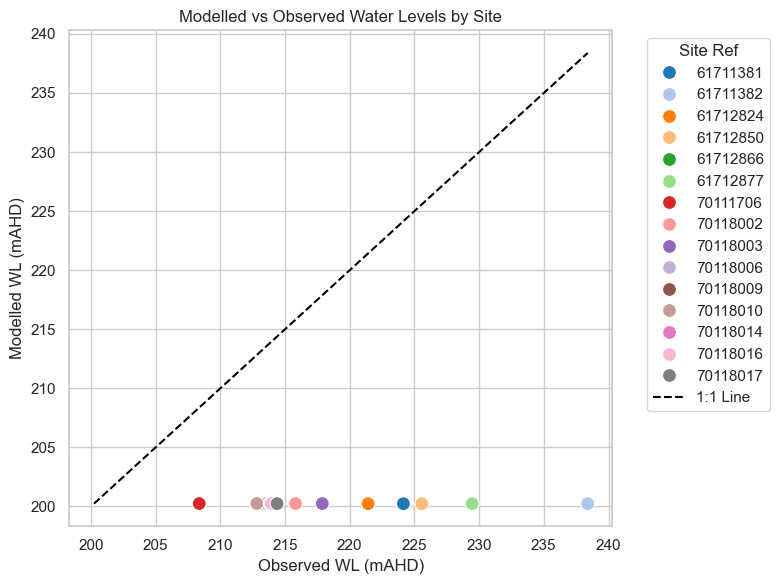

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plot the observed and modelled heads
observed_df = pd.read_excel('../data/data_waterlevels/obs/06_Steady_state_groundwater_obs.xlsx')
modelled_df = pd.read_csv('../modelfiles/steadymodel_observations.csv')

#print(observed_df.columns)
#print(observed_df)
#print(modelled_df)

observed_subset = observed_df[['Site Ref', 'Derived WL (mAHD)']].copy()
observed_subset['Site Ref'] = observed_subset['Site Ref'].astype(str)

modelled_long = modelled_df.T.reset_index()
modelled_long = modelled_long[1:]
modelled_long.columns = ['Site Ref', 'Modelled WL (mAHD)']
modelled_long['Site Ref'] = modelled_long['Site Ref'].astype(str)
#print(modelled_long)

merged_df = pd.merge(observed_subset, modelled_long, on='Site Ref', how='inner')

print(merged_df)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=merged_df,
    x='Derived WL (mAHD)',
    y='Modelled WL (mAHD)',
    hue='Site Ref',            # Color by Site Ref
    palette='tab20',           # Optional: Use a color palette with more unique hues
    s=100                      # Optional: Size of points
)

# Add 1:1 line for reference
max_val = max(merged_df['Derived WL (mAHD)'].max(), merged_df['Modelled WL (mAHD)'].max())
min_val = min(merged_df['Derived WL (mAHD)'].min(), merged_df['Modelled WL (mAHD)'].min())
plt.plot([min_val, max_val], [min_val, max_val], ls='--', color='black', label='1:1 Line')

# Labels and legend
plt.xlabel('Observed WL (mAHD)')
plt.ylabel('Modelled WL (mAHD)')
plt.title('Modelled vs Observed Water Levels by Site')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Site Ref')
plt.tight_layout()
plt.show()

In [24]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims...
  writing model example_1...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package rcha_0...
    writing package tas_0...
FloPy is using the following executable to run the model: ..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                  VERSION 6.5.0.dev0 (preliminary) 01/29/2024
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Jan 29 2024 03:01:13 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received

(True, [])